# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

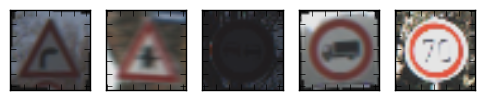

In [16]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
f, axarr = plt.subplots(1, 5)
for i in range(5):
    axarr[i].imshow(X_train[i])
    plt.setp(axarr[i].get_xticklabels(), visible=False)
    plt.setp(axarr[i].get_yticklabels(), visible=False)
plt.show()
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
import numpy as np
#from sklearn.cross_validation import KFold
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import scipy.ndimage

new_training_file = "./traffic-signs-data/new_train.p"


In [ ]:
####################################################
# generate additional data
# WARNING: no need to run this if new_train.p exists

print("Generating additional data...")
image_counts = np.bincount(y_train)
print("Original data counts: ", image_counts)
max_count = max(image_counts)
rot = [-5, 5, -10, 10]
expand_factor = np.zeros(len(image_counts), dtype=np.int)
for i in range(len(image_counts)):
    if image_counts[i] < 0.2 * max_count:
        expand_factor[i] = 4
    elif image_counts[i] < 0.3 * max_count:
        expand_factor[i] = 3
    elif image_counts[i] < 0.5 * max_count:
        expand_factor[i] = 2
    elif image_counts[i] < 0.7 * max_count:
        expand_factor[i] = 1
print("Expand factor: ", expand_factor)
print("Expand factor length:", len(expand_factor))
X_train_new = []
y_train_new = []
for i in range(len(y_train)):
    X_img = X_train[i]
    y_val = y_train[i]
    X_train_new.append(X_img)
    y_train_new.append(y_val)
    factor = expand_factor[y_val]
    if factor > 0:
        for f in range(factor):
            X_img = scipy.ndimage.rotate(X_img, rot[f], reshape=False)
            X_train_new.append(X_img)
            y_train_new.append(y_val)
image_counts = np.bincount(y_train_new)
print("y train", len(y_train_new))
print("New data counts: ", image_counts)

###################################################
# dump new training file

new_data = {'features':X_train_new, 'labels':y_train_new}
with open(new_training_file, mode='wb') as f:
    test = pickle.dump(new_data, f)
print('New data saved')


In [5]:
####################################################
# load new training data from new_train.p

with open(new_training_file, mode='rb') as f:
    new_data = pickle.load(f)
X_train = np.array(new_data['features'])
y_train = np.array(new_data['labels'])
image_counts = np.bincount(y_train)
print("New data counts: ", image_counts)
n_train = len(X_train)

####################################################
# normalize rgb values

X_train = X_train / 255.0 * 0.8 + 0.1
X_test = X_test / 255.0 * 0.8 + 0.1

####################################################
# global variables

EPOCHS = 80
BATCH_SIZE = 128
LEARNING_RATE = 0.001
KEEP_PROB = 0.75
N_TRAIN = n_train
N_CLASSES = n_classes
IMAGE_SHAPE = image_shape


New data counts:  [1050 2220 2250 2820 1980 1860 2100 2880 2820 2940 2010 2640 2100 2160 2340
 2520 2100 3330 2400 1050 1800 1650 1950 2040 1350 3000 2400 1200 2160 1350
 1800 2340 1200 2067 2100 2400 1950 1050 2070 1500 1800 1200 1200]


In [6]:
####################################################
# network

def network(x, keep_prob):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0.0
    sigma = 0.1
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x32.
    conv1_w = tf.Variable(tf.truncated_normal(shape=(3,3,3,32), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    # TODO: Layer 2: Convolutional. Input = 30x30x32 Output = 28x28x64.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(3,3,32,64), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,1,1,1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    # TODO: Flatten. Input = 28x28x64. Output = 50176
    fc0 = flatten(conv2)
    # TODO: Layer 3: Fully Connected. Input = 50176. Output = 512.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(50176, 512), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    # TODO: Layer 4: Fully Connected. Input = 512. Output = N_CLASSES.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(512, N_CLASSES), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(N_CLASSES))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b
    logits = tf.nn.dropout(fc2, keep_prob)
    return logits


In [7]:
####################################################
# pipeline

x = tf.placeholder(tf.float32, (None, IMAGE_SHAPE[0], IMAGE_SHAPE[1], IMAGE_SHAPE[2]))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
with tf.device('/cpu:0'):
    one_hot_y = tf.one_hot(y, N_CLASSES)
logits = network(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)
prediction = tf.argmax(logits, 1)
answer = tf.argmax(one_hot_y, 1)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

####################################################
# evaluate function

def evaluate(X_test_, y_test_, accuracy_operation):
    sess = tf.get_default_session()
    num_input = len(X_test_)
    total_accuracy = 0
    for offset in range(0, num_input, BATCH_SIZE):
        batch_x, batch_y = X_test_[offset:offset+BATCH_SIZE], y_test_[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_input


In [8]:
####################################################
# Main

# train model
with tf.Session() as sess:
    print("Training...")
    print()
    sess.run(tf.global_variables_initializer())
    X_train, X_validation, y_train, y_validation \
            = train_test_split(X_train, y_train, test_size=0.2, random_state=27457)
    print("{} Training set, {} Validation set".format(len(X_train), len(X_validation)))
    for ie in range(EPOCHS):
        print("EPOCH {} ...".format(ie+1))
        X_train, y_train = shuffle(X_train, y_train)
        for ib, offset in enumerate(range(0, len(X_train), BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x = np.array(X_train[offset:end])
            batch_y = np.array(y_train[offset:end])
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB})
            #print("pred: ", sess.run(prediction, feed_dict={x: batch_x}))
            #print("ans: ", batch_y)
        validation_accuracy = evaluate(X_validation, y_validation, accuracy_operation)
        print("Validation Accuracy = {:.4f}".format(validation_accuracy))
    print()
    saver = tf.train.Saver()
    saver.save(sess, "./model")
    print("Model saved")
    print()


Training...

69717 Training set, 17430 Validation set
EPOCH 1 ...
Validation Accuracy = 0.9800
EPOCH 2 ...
Validation Accuracy = 0.9915
EPOCH 3 ...
Validation Accuracy = 0.9931
EPOCH 4 ...
Validation Accuracy = 0.9958
EPOCH 5 ...
Validation Accuracy = 0.9972
EPOCH 6 ...
Validation Accuracy = 0.9962
EPOCH 7 ...
Validation Accuracy = 0.9958
EPOCH 8 ...
Validation Accuracy = 0.9970
EPOCH 9 ...
Validation Accuracy = 0.9970
EPOCH 10 ...
Validation Accuracy = 0.9975
EPOCH 11 ...
Validation Accuracy = 0.9967
EPOCH 12 ...
Validation Accuracy = 0.9958
EPOCH 13 ...
Validation Accuracy = 0.9974
EPOCH 14 ...
Validation Accuracy = 0.9966
EPOCH 15 ...
Validation Accuracy = 0.9979
EPOCH 16 ...
Validation Accuracy = 0.9978
EPOCH 17 ...
Validation Accuracy = 0.9979
EPOCH 18 ...
Validation Accuracy = 0.9963
EPOCH 19 ...
Validation Accuracy = 0.9980
EPOCH 20 ...
Validation Accuracy = 0.9974
EPOCH 21 ...
Validation Accuracy = 0.9980
EPOCH 22 ...
Validation Accuracy = 0.9980
EPOCH 23 ...
Validation Accurac

In [27]:
####################################################
# test model
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, "./model")
    test_accuracy = evaluate(X_test, y_test, accuracy_operation)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Test Accuracy = 0.967


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I normalized RGB level of all image in 0.1 to 0.9 range, to control variation of my model.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I found that there is a large variation of data counts between classes. 
So I checked data count of each class, and generated new images of classes which have relatively less data.
I controlled the number of newly generated data according to image count of each class, to ensure certain amount of data count in all classes.
Image generation is done by rotating existing images.
Test set is provided from the beggining.
To make validation set, I randomly splited out 20% of data from training set.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I used two convolution layer and two fully-connected layer in my model.
First convolution layer has 3x3 kernel with valid padding, and output has depth of 32.
Second convolution layer also has 3x3 kernel with valid padding, and output has depth of 64.
First fully-connected layer has 512 output.
Second fully-connected layer has 43 output, which is the number of classes.
Between each layers, there are activation layers with ReLu function.
To prevent overfitting, I dropped out 25% of connection in both of fully-connected layers.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I trained model while shuffling data in each epoch, for 80 epochs with batch size of 128.
I calculated loss by using softmax_cross_entropy_with_logits, and optimized with AdamOptimizer.
For learning rate, I choosed 0.001 which seemed to generate the best performance in learning.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

First, I tried to build neural network in intuitive way.
I thought I need two convolution layers - first one to extract basic geometry features, and second one to extract combined features. I expanded volume of parameter set in convolution layers from original image data, and then reduced it in fully-connected layers.
I removed pooling layers not to make any loss of data, but applied drop-out to prevent overfitting.
Tuning of dimensions, such as depth and kernel size, is done by few iteration of trial end error.
In each iteration, I tracked error, accuracy.
Finally, I got 96.7% accuracy from the test data.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

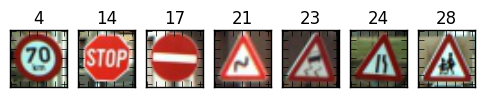

In [47]:
####################################################
# import additional images

y_test_new = [4, 14, 17, 21, 23, 24, 28]
n_test_new = len(y_test_new)

from skimage import io
X_test_new = np.uint8(np.zeros((n_test_new, image_shape[0], image_shape[1], image_shape[2])))
for i in range(n_test_new):
    image = io.imread("./new-traffic-signs-data/new_{}.jpg".format(y_test_new[i]))
    X_test_new[i] = image

f, axarr = plt.subplots(1, n_test_new)
for i in range(n_test_new):
    axarr[i].set_title(y_test_new[i])
    axarr[i].imshow(X_test_new[i])
    plt.setp(axarr[i].get_xticklabels(), visible=False)
    plt.setp(axarr[i].get_yticklabels(), visible=False)
plt.show()

####################################################
# normalize rgb values
X_test_new = X_test_new / 255.0 * 0.8 + 0.1


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I brought 7 images for additional test. Those images and their class ids are listed above.
I think my classifier might confused to classify image with class 21, 23, 24 and 28, because they have complex shapes in them.

In [66]:
####################################################
# test new images

with tf.Session() as sess:
    saver.restore(sess, "./model")
    saver.restore(sess, "./model")
    prediction_new = tf.nn.softmax(logits)
    #prediction_new = prediction
    print("Start pred")
    pred = sess.run(prediction_new, feed_dict={x: X_test_new, keep_prob: 1.0})
    print("Finish pred")
    pred_val = tf.argmax(pred, 1).eval()
    top_k = sess.run(tf.nn.top_k(pred, 5, sorted=True))
    for i in range(n_test_new):
        print("Image", i + 1)
        print(" - prediction: {}, answer: {}".format(pred_val[i], y_test_new[i]))
        print(" - correct: ", pred_val[i] == y_test_new[i])

Start pred
Finish pred
Image 1
 - prediction: 8, answer: 4
 - correct:  False
Image 2
 - prediction: 14, answer: 14
 - correct:  True
Image 3
 - prediction: 17, answer: 17
 - correct:  True
Image 4
 - prediction: 28, answer: 21
 - correct:  False
Image 5
 - prediction: 27, answer: 23
 - correct:  False
Image 6
 - prediction: 24, answer: 24
 - correct:  True
Image 7
 - prediction: 28, answer: 28
 - correct:  True


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

My classifier classified 4 images well out of 7, so the accuracy is 57%, while the model prediction accuracy on the training set was 96.7%. It shows that my model did not performed well out of the test set. The reason might be the lack of data for training and testing, which can lead misclassification of real world example.

Here, I listed prediction and answer of my example set.

Image 1 : FAIL
 - prediction: Speed limit (120km/h), answer: Speed limit (70km/h)
 
Image 2 : SUCCESS
 - prediction: Stop, answer: Stop
 
Image 3 : SUCCESS
 - prediction: No entry, answer: No entry
 
Image 4 : FAIL
 - prediction: Children crossing, answer: Double curve
 
Image 5 : FAIL
 - prediction: Pedestrians, answer: Slippery road
 
Image 6 : SUCCESS
 - prediction: Road narrows on the right, answer: Road narrows on the right
 
Image 7 : SUCCESS
 - prediction: Children crossing, answer: Children crossing
 

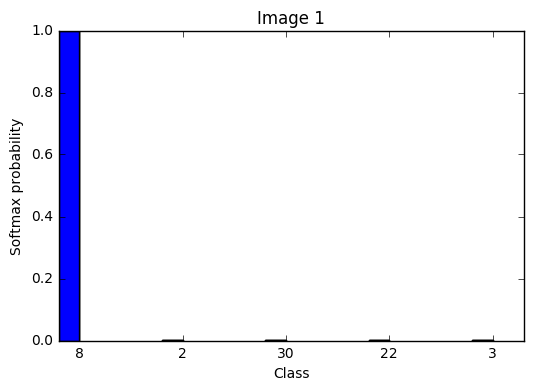

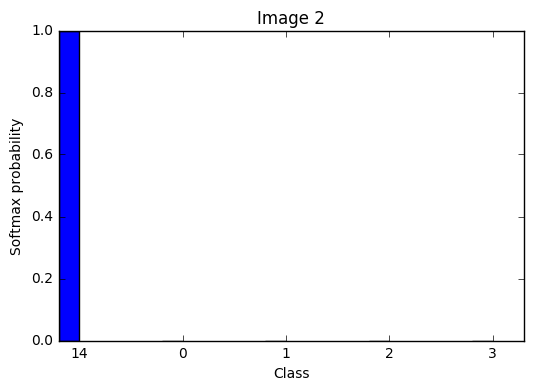

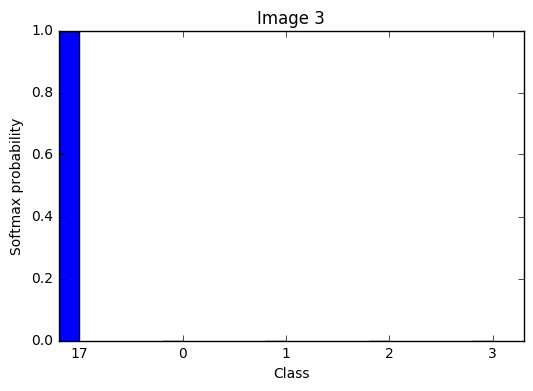

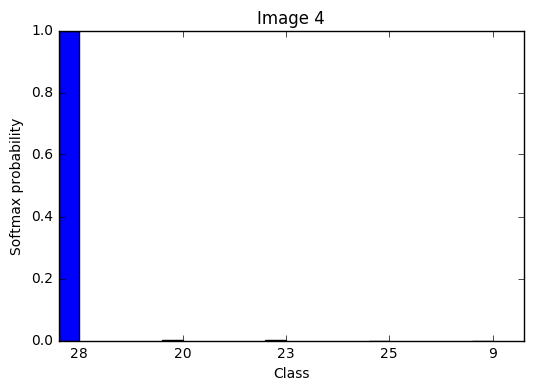

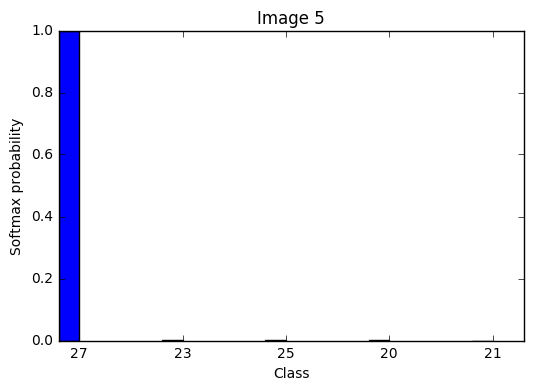

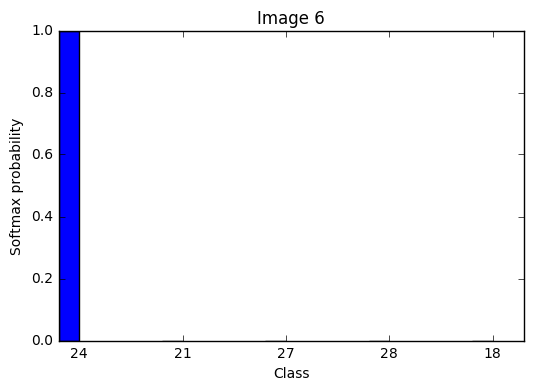

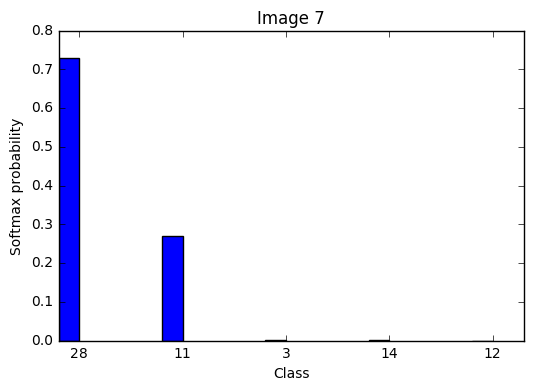

In [75]:
top_k_values = top_k[0]
top_k_indices = top_k[1]
plt_x_pos = np.arange(5)
plt_bar_width = 0.2

for i in range(n_test_new):
    plt.figure(i)
    plt.bar(plt_x_pos, top_k_values[i], plt_bar_width)
    plt.ylabel("Softmax probability")
    plt.xlabel("Class")
    plt.title("Image {}".format(i + 1))
    plt.xticks(plt_x_pos + plt_bar_width, tuple(top_k_indices[i]))
plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)

I have to say all of the predictions are very certain according to the results. The least certain case is Image 7, but even in that the largest probability was over 0.7. Image 1 and 4 don't have the correct predictions in the top 5. Only Image 5 has the correct prediction as top 2, though the probability level is very low.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.